<a href="https://colab.research.google.com/github/405620294/webcrawler_Tmall/blob/main/%E5%B0%88%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 載入資料
import pandas as pd
raw_df = pd.read_csv('tao.csv', encoding='utf-8')

In [2]:
import jieba.analyse
from urllib.request import urlretrieve
import jieba

# 過濾無用評論&
dic = { '此用户没有填写评论!' : None }
comment1 = raw_df['1st_comment'].replace(dic).dropna()
comment2 = raw_df['2nd_comment'].dropna()
all_comment = pd.concat([comment1, comment2])

f = open("all_comment.txt", "w", encoding="utf-8")
all_comment = pd.concat([comment1, comment2])
for i in all_comment:
  # print(type(i), i)
  f.write(i)
  f.write("\n")
f.close()

s = ''
for i in all_comment:
  s = s + i

url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
urlretrieve(url, "dict.txt.big")
jieba.set_dictionary("dict.txt.big")
jieba.load_userdict("自定義.txt") #使用者自定義辭典的路徑

keywords = jieba.analyse.extract_tags(s)  #基于 TF-IDF 算法的关键词抽取
print("關鍵字：", keywords )

Building prefix dict from /content/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
Loading model cost 1.691 seconds.
Prefix dict has been built successfully.


關鍵字： ['颜色', '好看', '口红', '喜欢', '真的', '哑光', '质地', '正品', '显白', '效果', '不错', '持久', '这个', '旗舰店', '非常', 'hellip', '超级', '假货', '上妆', '适合']


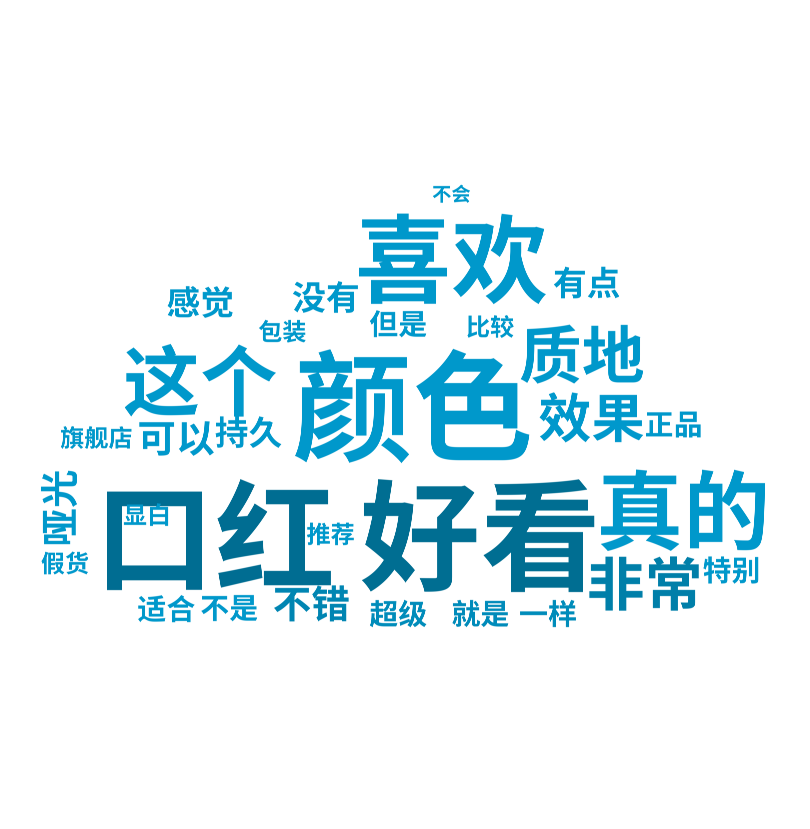

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude

text = " ".join(jieba.cut(s))

# Mask image
mask_color = np.array(Image.open('/content/dftm96zyf-removebg-preview.png'))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


# Edge detection
edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255


# WordCloud
wc = WordCloud(max_words=2000,
         mask=mask_image,
          background_color = 'white',
          font_path='/content/NotoSansSC-Bold.otf',
          scale = 100,
          collocations=False,
          relative_scaling=0)

wc.generate(text)

# Create coloring from image
image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)

# Plot
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [3]:
pd.set_option('display.max_rows', None)
fake_df = raw_df[raw_df['1st_comment'].str.contains('假货') | raw_df['2nd_comment'].str.contains('假货')]
fake_df

,id,product,1st_time,1st_comment,2nd_time,2nd_comment
34,1123008904325,FLY FI,2021-03-01 21:04:58,此用户没有填写评论!,2021-03-12 12:34:30,假货无疑，吃东西，嘴上一部分掉了，一部分还在。但是又用纸巾擦不下来，不好用。
119,1123336025654,LOVE LIFE,2021-02-28 14:24:11,怎么说呢，本来以为收到了假货，因为打开之后把口红拧出来的时候很松，质量不行，但是呢，口红颜色...,2021-03-14 14:38:04,我的天，今天想起来用，结果揣到兜里，来到公司就这样了
544,1118649729752,GOLDIE,2021-01-11 22:56:12,壳的质感也太差了吧！我感觉好像买了9.9的假货一样....,NaN,NaN
627,1119719052699,ZIGGIE,2021-01-24 15:50:28,假货,2021-01-27 23:29:29,假货，千万别买
941,1116513686263,ZIGGIE,2020-10-06 14:40:14,此用户没有填写评论!,2020-12-23 10:28:10,假货！假旗舰店！辣鸡！！
1103,1114005686643,PRIMER,2020-12-05 13:22:57,很失望 跟我之前从官网买的一点都不一样 官网的膏体有colourpop贯有的巧克力味 这个唇...,NaN,NaN
1118,1113728285230,ZIGGIE,2020-11-13 16:02:39,此用户没有填写评论!,2020-12-06 11:19:46,原来是假货啊，我同事告诉我才知道的，**，整个口红的质感完全不一样，知道是假的我就不买了，哭...
1148,1113501269523,ZIGGIE,2020-12-04 14:17:30,买之前不知道是假货，没有下次了，再见,NaN,NaN
1150,1113501269525,GOLDIE,2020-12-04 14:17:30,买之前不知道是假货，没有下次了，再见,NaN,NaN
1224,1112966151891,ZIGGIE,2020-11-26 12:42:22,根本就是假货别买了 塑料壳子廉价的要* 不是正品的质感,NaN,NaN
